In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score

# SK-learn

## Bagging

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# параметр noise отвечает за рассеянность класса

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

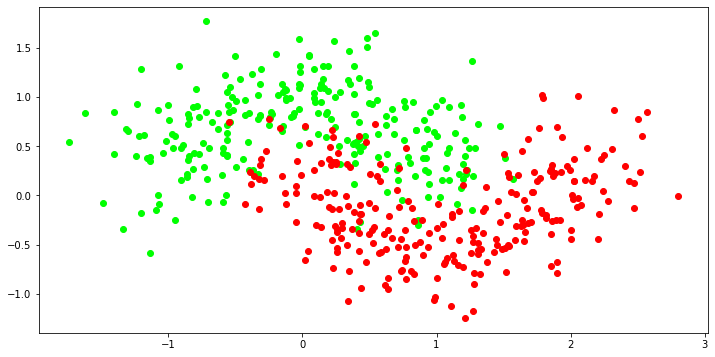

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color = (0,1,0))
plt.scatter(X[y==1, 0], X[y==1, 1], color = (1,0,0));



In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Параметр max_samples важный в ансамбле и говорит о количестве элементов на котором будет учиться(в нашем примере дерево)
# bootstrap=True выборка с возвращением(повторением)
# n_jobs=-1 загрузка ядер процессора ,-1 система сама понимает сколько надо использовать
# n_estimators - количество прогнозаторов
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [6]:
print(accuracy_score(y_test, y_pred))

0.904


In [7]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


## Оценка на неиспользуемых образцах

In [8]:
df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [9]:
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
X = df.drop(['State', 'Churn'], axis = 1)
Y = df['Churn']

test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
X_test = test_df.drop(['State', 'Churn'], axis = 1)
Y_test = test_df['Churn']


In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=0.3, bootstrap=True, oob_score = True, n_jobs=-1, random_state=42)
bag_clf.fit(X, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.3, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [12]:
bag_clf.oob_score_

0.9508627156789198

In [13]:
pred = bag_clf.predict(X_test)
accuracy_score (Y_test, pred)

0.9550224887556222

## Метод случайных участков

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=0.3, bootstrap=True, oob_score = True, n_jobs=-1, random_state=42,
    bootstrap_features = True, max_features = 0.6)


bag_clf.fit(X, Y)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap_features=True, max_features=0.6, max_samples=0.3,
                  n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
bag_clf.oob_score_

0.8840960240060015

## Метод случайных подпространств

In [30]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=42,
    bootstrap_features = True, max_features = 0.6)

bag_clf.fit(X, Y)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, bootstrap_features=True, max_features=0.6,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [16]:
pred = bag_clf.predict(X_test)
accuracy_score (Y_test, pred)

0.8950524737631185

## Случайный лес

In [19]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes = 16, 
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X, Y)

y_pred_rf = rnd_clf.predict(X_test)

In [20]:
print(accuracy_score(Y_test, y_pred_rf))

0.9220389805097451


In [50]:
# Метод подпространств
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes = 16, 
                                 bootstrap=False, max_features=0.6,
                                 max_samples=1,
                                 n_jobs=-1, random_state=42)
#rnd_clf.fit(X, Y)

In [47]:
#y_pred_rf = rnd_clf.predict(X_test)
#print(accuracy_score(Y_test, y_pred_rf))

0.9565217391304348


In [21]:
# BONUS Значимость признаков
for name, score in zip(X.columns.tolist(), rnd_clf.feature_importances_):
    print(name, score)

Account length 0.008240627695349497
Area code 0.0009663491139222093
International plan 0.12951915904871464
Voice mail plan 0.025386142063919724
Number vmail messages 0.029785509259198005
Total day minutes 0.1780335053267436
Total day calls 0.00889762489063886
Total day charge 0.18686230808275212
Total eve minutes 0.05452832086739277
Total eve calls 0.006842112133060145
Total eve charge 0.053620204875747916
Total night minutes 0.017707845272428205
Total night calls 0.008192311322670122
Total night charge 0.017660863426316856
Total intl minutes 0.03522095920906843
Total intl calls 0.045428530928535014
Total intl charge 0.03565411493036498
Customer service calls 0.15745351155317705


## BOOSTING

In [25]:
# ADA BOOST

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X, Y)
#algorithm="SAMME.R"

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [26]:
y_pred_rf = ada_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred_rf))

0.8905547226386806


In [27]:
# GradientBoosting
# сгенерируем данные
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [77]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [78]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [79]:
X_new = np.array([[0.8]])

In [81]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [29]:
# Вернемся к отлюченцам
df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
X = df.drop(['State', 'Churn'], axis = 1)
Y = df['Churn']

test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
X_test = test_df.drop(['State', 'Churn'], axis = 1)
Y_test = test_df['Churn']


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gbc = GradientBoostingClassifier(n_estimators = 200,
                                max_depth = 1,
                                random_state = 15)
gbc.fit(X,Y)

GradientBoostingClassifier(max_depth=1, n_estimators=200, random_state=15)

In [34]:
pred = gbc.predict(X_test)
accuracy_score(Y_test, pred)

0.8860569715142429

In [35]:
cross_val_score (gbc, X,Y, cv = 5, scoring = 'f1' )

array([0.33027523, 0.46956522, 0.29906542, 0.48275862, 0.45762712])

In [38]:
!pip install xgboost

In [39]:
import xgboost as gb

## Практика 
### пишем вместе либо стекинг, либо тюним gbc 

1. DS California - (наш датасет,так как много данных там). regression.
2. Список используемых моделей:
    а)KNN
    b)SGDRegressor
    c)DecisionTreeRegressor
    d)GBR
3. LinearRegression :Промежуточный датасет,обученные модели будем через него прогонять.
4.Придумать структуру,название полей для промежуточного датасета.(пункта 3)
    

## 1. Починить пробелы (null)
## 2.Делим данные на 3 части, 
## где 20% это проверка финальная
## 80% оставшихся делим 50 на 50.(объявить каку-то тестовую,каку-то обученную)
## 3. Обучить классификатор.
## 4.Сформировать промежуточный датасет
## 5.Обучить верхний классификатор



Напоминаю, мы пошагово реализовываем стекинг.
Идея стекинга в том, чтобы обучить топовый классификатор на прогнозах классификаторов первого уровня.
Мы с вами выбрали 4 классификатора первого уровня и последний топовый svr.
Мы с вами выбрали набор данных housing.

Данные мы предобработали (убрали пропуски, стандартизировали), разделили на 3 части, обучили базовые модели, создали датасет для обучения регрессора верхнего уровня и обучили этот регрессор.

Нам осталось только написать функцию прогнозирования, которая будет сперва прогнозировать моделями первого уровня и на основании этих прогнозов получать окончательный прогноз моделью верхнего уровня (топовой моделью). 

И выполнить оценку точности! ))


In [186]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor,LinearRegression

In [187]:
# CW18
df = pd.read_csv('housing.csv')

In [188]:
medianit = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(medianit, inplace = True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [190]:
df = pd.get_dummies(df)

In [191]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [194]:
X = df.drop(['median_house_value'],axis = 1)
Y = df['median_house_value']

In [195]:
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [196]:
# и теперь снова наш X_train(80%) делим пополам 50 на 50 , test_size = 0.5
# на t1 обучаем базовые классификаторы, а на t2  обучаем тестовые классификаторы
X_t1, X_t2, Y_t1,  Y_t2 = train_test_split(X_train, Y_train, test_size = 0.5, random_state = 5)

In [197]:
mid_data= pd.DataFrame(columns=['KNN','L','DTR','GBR'])

In [198]:
mid_data

,KNN,L,DTR,GBR


In [199]:
# Time for traing

L_reg=LinearRegression()
L_reg.fit(X_t1,Y_t1)

LinearRegression()

In [200]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_t1, Y_t1)

KNeighborsRegressor()

In [201]:
grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_t1,Y_t1)

GradientBoostingRegressor()

In [202]:
DTR_reg = DecisionTreeRegressor() 
DTR_reg.fit(X_t1, Y_t1)

DecisionTreeRegressor()

In [203]:
mid_data['L'] = L_reg.predict(X_t2)
mid_data['KNN'] = knn_reg.predict(X_t2)
mid_data['DTR'] = DTR_reg.predict(X_t2)
mid_data['GBR'] = grad_reg.predict(X_t2)

In [204]:
mid_data

,KNN,L,DTR,GBR
0,129220.0,104056.991021,140700.0,113659.220133
1,500001.0,664681.651535,500001.0,514378.161605
2,159360.0,231011.927003,191100.0,217120.154332
3,269080.2,112917.494491,200000.0,115849.764956
4,191420.0,129347.943121,87900.0,113436.910655
...,...,...,...,...
8251,187820.0,149168.057204,157900.0,171107.922227
8252,365980.2,394875.558462,500001.0,461452.762584
8253,102040.0,176242.482562,118600.0,191472.632094
8254,279100.2,206578.009721,230800.0,212538.085326


In [205]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [206]:
#  в обучении регрессора верхнего уровня обязательно сделаем масштабирование( выше мы сделали только для нижнего уровня регрессора)
pipe_svr = make_pipeline(StandardScaler(), SVR())
pipe_svr.fit(mid_data, Y_t2)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [207]:
mid_data_2= pd.DataFrame(columns=['KNN','L','DTR','GBR'])
mid_data_2['L'] = L_reg.predict(X_t1)
mid_data_2['KNN'] = knn_reg.predict(X_t1)
mid_data_2['DTR'] = DTR_reg.predict(X_t1)
mid_data_2['GBR'] = grad_reg.predict(X_t1)

In [213]:
# снова необходимо масштабирование!
sc2 = StandardScaler()
mid_data_2_=sc2.fit_transform(mid_data)
svr = SVR()
svr.fit(mid_data_2_,Y_t2)

SVR()

In [214]:
def ST_pred(X,scaler):
    mid_data_2= pd.DataFrame(columns=['KNN','L','DTR','GBR'])
    mid_data_2['L'] = L_reg.predict(X)
    mid_data_2['KNN'] = knn_reg.predict(X)
    mid_data_2['DTR'] = DTR_reg.predict(X)
    mid_data_2['GBR'] = grad_reg.predict(X)
    
    return svr.predict(scaler.transform(mid_data_2))
# scaler.transform необходимо сделать для масштабирования

In [215]:
pred = ST_pred(X_t1,sc2)

In [ ]:
# У НАС РЕГРЕССИЯ, ЗНАЧИТ ВЫБИРАЕМ МЕТРИКУ math.sqrt(mean_squared_error)

In [216]:
from sklearn.metrics import mean_squared_error

In [217]:
math.sqrt(mean_squared_error(Y_t1,pred))

117960.06244195721

In [127]:
#for name, values in mid_data.iteritems():
#        print('{name}: {value}'.format(name=name, value=values[1]))

KNN: 500001.0
L: 664681.6515351268
DTR: 500001.0
GBR: 514378.16160474974


# Вариант номер 2 через класс StackingRegressor

In [218]:
from sklearn.ensemble import StackingRegressor

estimators = [('tr', DecisionTreeRegressor()),('knn',KNeighborsRegressor()),('gdb', GradientBoostingRegressor()),('l', LinearRegression()) ]


In [219]:
stakreg = StackingRegressor(estimators=estimators, final_estimator=make_pipeline(StandardScaler(),SVR()))


In [221]:
fitstakreg = stakreg.fit(X_train,Y_train)


In [222]:
y_fitstakreg= stakreg.predict(X_test)

In [223]:
mean_squared_error(Y_test,y_fitstakreg)

14219833596.705233

Доброго дня.

Вопросы для обдумывания.
Если вы обучили пять разных моделей на одних и тех же обучающих данных, и все модели дают точность 95%, можно ли как то скомбинировать модели модели чтобы в итоге повысить точность? Если да то как? Если нет то почему?
В чем разница между классификаторами с мягким и жестким голосованием.
Можно ли ускорить обучение ансамблевой модели с беггингом распределив обучение на множество серверов? Тот же вопрос про случайные леса. Тот же вопрос про бустинги.
Как можно использовать оценку на неиспользуемых образцах при использовании бутстрэпа?
Если Ваш ансамбль ada-boost недообучился на обучающих данных, какие гипер параметры вы должны подстраивать и каким образом?

Присылайте ответы.



Для желающий допилить работу в группе.

Напоминаю, мы пошагово реализовываем стекинг.
Идея стекинга в том, чтобы обучить топовый классификатор на прогнозах классификаторов первого уровня.
Мы с вами выбрали 4 классификатора первого уровня и последний топовый svr.
Мы с вами выбрали набор данных housing.

Данные мы предобработали (убрали пропуски, стандартизировали), разделили на 3 части, обучили базовые модели, создали датасет для обучения регрессора верхнего уровня и обучили этот регрессор.

Нам осталось только написать функцию прогнозирования, которая будет сперва прогнозировать моделями первого уровня и на основании этих прогнозов получать окончательный прогноз моделью верхнего уровня (топовой моделью). 

И выполнить оценку точности! ))

P.S. в обучении регрессора верхнего уровня мы кое что забыли - что мы забыли?
P.P.S. то что мы забыли должно входить в функцию прогнозирования. )))
